In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 96% 116M/121M [00:00<00:00, 218MB/s] 
100% 121M/121M [00:00<00:00, 208MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-expression-recognition-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, Dense, MaxPooling2D, Activation,Dropout

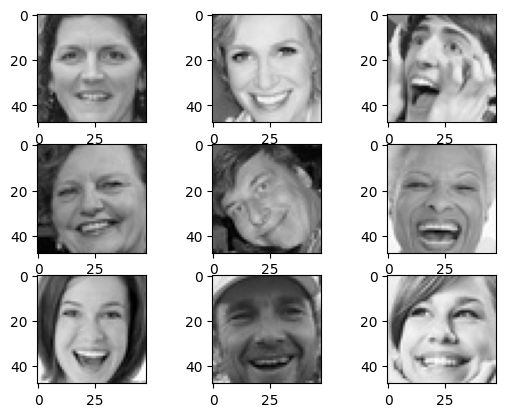

In [5]:
pic_size = 48
folder_path = "/content/images"

expression = 'happy'
plt.figure()
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path + '/train/' + expression + '/' + os.listdir(folder_path + '/train/' +expression)[i], target_size = (pic_size, pic_size))
    plt.imshow(img)
plt.show()

In [21]:
batch_size = 128
data_train = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
data_test = ImageDataGenerator(
    rescale=1./255
)

train_set = data_train.flow_from_directory(folder_path+"/train",
                                              target_size = (pic_size,pic_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)
test_set = data_test.flow_from_directory(folder_path+"/validation",
                                              target_size = (pic_size,pic_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [22]:
no_of_classes = 7
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(256,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25)

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 128)      

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./myfermodel_e11.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=4,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [25]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list)

Epoch 1/48


<ipython-input-25-9886a6645606>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


225/225 [==============================] - ETA: 0s - loss: 1.8441 - accuracy: 0.2788

225/225 [==============================] - 36s 133ms/step - loss: 1.8441 - accuracy: 0.2788 - val_loss: 2.2547 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.5735 - accuracy: 0.3905

225/225 [==============================] - 29s 128ms/step - loss: 1.5735 - accuracy: 0.3905 - val_loss: 1.9954 - val_accuracy: 0.3551 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.3984 - accuracy: 0.4609

225/225 [==============================] - 29s 131ms/step - loss: 1.3984 - accuracy: 0.4609 - val_loss: 1.5310 - val_accuracy: 0.4273 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.3220 - accuracy: 0.4944

225/225 [==============================] - 27s 122ms/step - loss: 1.3220 - accuracy: 0.4944 - val_loss: 1.2426 - val_accuracy: 0.5293 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 1.2606 - accuracy: 0.5184

225/225 [==============================] - 27s 120ms/step - loss: 1.2606 - accuracy: 0.5184 - val_loss: 1.2613 - val_accuracy: 0.5233 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.2189 - accuracy: 0.5371

225/225 [==============================] - 27s 120ms/step - loss: 1.2189 - accuracy: 0.5371 - val_loss: 1.2123 - val_accuracy: 0.5352 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 1.1944 - accuracy: 0.5456

225/225 [==============================] - 28s 125ms/step - loss: 1.1944 - accuracy: 0.5456 - val_loss: 1.4817 - val_accuracy: 0.4145 - lr: 0.0010
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 1.1629 - accuracy: 0.5553

225/225 [==============================] - 27s 122ms/step - loss: 1.1629 - accuracy: 0.5553 - val_loss: 1.1919 - val_accuracy: 0.5327 - lr: 0.0010
Epoch 9/48
225/225 [==============================] - ETA: 0s - loss: 1.1510 - accuracy: 0.5616

225/225 [==============================] - 30s 134ms/step - loss: 1.1510 - accuracy: 0.5616 - val_loss: 1.1299 - val_accuracy: 0.5659 - lr: 0.0010
Epoch 10/48
225/225 [==============================] - ETA: 0s - loss: 1.1226 - accuracy: 0.5739

225/225 [==============================] - 28s 123ms/step - loss: 1.1226 - accuracy: 0.5739 - val_loss: 1.1612 - val_accuracy: 0.5601 - lr: 0.0010
Epoch 11/48
225/225 [==============================] - ETA: 0s - loss: 1.1084 - accuracy: 0.5772

225/225 [==============================] - 28s 123ms/step - loss: 1.1084 - accuracy: 0.5772 - val_loss: 1.2320 - val_accuracy: 0.5338 - lr: 0.0010
Epoch 12/48
225/225 [==============================] - ETA: 0s - loss: 1.0897 - accuracy: 0.5859

225/225 [==============================] - 27s 122ms/step - loss: 1.0897 - accuracy: 0.5859 - val_loss: 1.0963 - val_accuracy: 0.5815 - lr: 0.0010
Epoch 13/48
225/225 [==============================] - ETA: 0s - loss: 1.0740 - accuracy: 0.5913

225/225 [==============================] - 27s 122ms/step - loss: 1.0740 - accuracy: 0.5913 - val_loss: 1.1231 - val_accuracy: 0.5759 - lr: 0.0010
Epoch 14/48
225/225 [==============================] - ETA: 0s - loss: 1.0603 - accuracy: 0.5980

225/225 [==============================] - 28s 122ms/step - loss: 1.0603 - accuracy: 0.5980 - val_loss: 1.2560 - val_accuracy: 0.5114 - lr: 0.0010
Epoch 15/48
225/225 [==============================] - ETA: 0s - loss: 1.0457 - accuracy: 0.6045

225/225 [==============================] - 27s 120ms/step - loss: 1.0457 - accuracy: 0.6045 - val_loss: 1.0821 - val_accuracy: 0.5911 - lr: 0.0010
Epoch 16/48
225/225 [==============================] - ETA: 0s - loss: 1.0234 - accuracy: 0.6104

225/225 [==============================] - 30s 133ms/step - loss: 1.0234 - accuracy: 0.6104 - val_loss: 1.3043 - val_accuracy: 0.5011 - lr: 0.0010
Epoch 17/48
225/225 [==============================] - ETA: 0s - loss: 1.0163 - accuracy: 0.6146

225/225 [==============================] - 28s 124ms/step - loss: 1.0163 - accuracy: 0.6146 - val_loss: 1.1790 - val_accuracy: 0.5439 - lr: 0.0010
Epoch 18/48
225/225 [==============================] - ETA: 0s - loss: 1.0108 - accuracy: 0.6175

225/225 [==============================] - 29s 127ms/step - loss: 1.0108 - accuracy: 0.6175 - val_loss: 1.0927 - val_accuracy: 0.5869 - lr: 0.0010
Epoch 19/48
225/225 [==============================] - ETA: 0s - loss: 0.9981 - accuracy: 0.6245


Epoch 19: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 27s 122ms/step - loss: 0.9981 - accuracy: 0.6245 - val_loss: 1.1020 - val_accuracy: 0.5760 - lr: 0.0010
Epoch 20/48
225/225 [==============================] - ETA: 0s - loss: 0.9425 - accuracy: 0.6454

225/225 [==============================] - 30s 134ms/step - loss: 0.9425 - accuracy: 0.6454 - val_loss: 0.9755 - val_accuracy: 0.6399 - lr: 2.0000e-04
Epoch 21/48
225/225 [==============================] - ETA: 0s - loss: 0.9269 - accuracy: 0.6488

225/225 [==============================] - 28s 123ms/step - loss: 0.9269 - accuracy: 0.6488 - val_loss: 0.9524 - val_accuracy: 0.6450 - lr: 2.0000e-04
Epoch 22/48
225/225 [==============================] - ETA: 0s - loss: 0.9185 - accuracy: 0.6540

225/225 [==============================] - 28s 124ms/step - loss: 0.9185 - accuracy: 0.6540 - val_loss: 0.9404 - val_accuracy: 0.6585 - lr: 2.0000e-04
Epoch 23/48
225/225 [==============================] - ETA: 0s - loss: 0.9036 - accuracy: 0.6591

225/225 [==============================] - 28s 124ms/step - loss: 0.9036 - accuracy: 0.6591 - val_loss: 0.9442 - val_accuracy: 0.6484 - lr: 2.0000e-04
Epoch 24/48
225/225 [==============================] - ETA: 0s - loss: 0.8996 - accuracy: 0.6613

225/225 [==============================] - 30s 133ms/step - loss: 0.8996 - accuracy: 0.6613 - val_loss: 0.9397 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch 25/48
225/225 [==============================] - ETA: 0s - loss: 0.8937 - accuracy: 0.6628

225/225 [==============================] - 28s 124ms/step - loss: 0.8937 - accuracy: 0.6628 - val_loss: 0.9396 - val_accuracy: 0.6548 - lr: 2.0000e-04
Epoch 26/48
225/225 [==============================] - ETA: 0s - loss: 0.8864 - accuracy: 0.6658

225/225 [==============================] - 28s 123ms/step - loss: 0.8864 - accuracy: 0.6658 - val_loss: 0.9323 - val_accuracy: 0.6607 - lr: 2.0000e-04
Epoch 27/48
225/225 [==============================] - ETA: 0s - loss: 0.8736 - accuracy: 0.6751

225/225 [==============================] - 28s 126ms/step - loss: 0.8736 - accuracy: 0.6751 - val_loss: 0.9675 - val_accuracy: 0.6416 - lr: 2.0000e-04
Epoch 28/48
225/225 [==============================] - ETA: 0s - loss: 0.8760 - accuracy: 0.6691

225/225 [==============================] - 28s 125ms/step - loss: 0.8760 - accuracy: 0.6691 - val_loss: 0.9308 - val_accuracy: 0.6615 - lr: 2.0000e-04
Epoch 29/48
225/225 [==============================] - ETA: 0s - loss: 0.8698 - accuracy: 0.6712

225/225 [==============================] - 27s 122ms/step - loss: 0.8698 - accuracy: 0.6712 - val_loss: 0.9334 - val_accuracy: 0.6608 - lr: 2.0000e-04
Epoch 30/48
225/225 [==============================] - ETA: 0s - loss: 0.8613 - accuracy: 0.6763

225/225 [==============================] - 28s 123ms/step - loss: 0.8613 - accuracy: 0.6763 - val_loss: 0.9272 - val_accuracy: 0.6584 - lr: 2.0000e-04
Epoch 31/48
225/225 [==============================] - ETA: 0s - loss: 0.8536 - accuracy: 0.6809

225/225 [==============================] - 27s 121ms/step - loss: 0.8536 - accuracy: 0.6809 - val_loss: 0.9191 - val_accuracy: 0.6702 - lr: 2.0000e-04
Epoch 32/48
225/225 [==============================] - ETA: 0s - loss: 0.8496 - accuracy: 0.6810

225/225 [==============================] - 29s 129ms/step - loss: 0.8496 - accuracy: 0.6810 - val_loss: 0.9233 - val_accuracy: 0.6648 - lr: 2.0000e-04
Epoch 33/48
225/225 [==============================] - ETA: 0s - loss: 0.8490 - accuracy: 0.6788

225/225 [==============================] - 29s 131ms/step - loss: 0.8490 - accuracy: 0.6788 - val_loss: 0.9556 - val_accuracy: 0.6487 - lr: 2.0000e-04
Epoch 34/48
225/225 [==============================] - ETA: 0s - loss: 0.8431 - accuracy: 0.6866

225/225 [==============================] - 27s 122ms/step - loss: 0.8431 - accuracy: 0.6866 - val_loss: 0.9422 - val_accuracy: 0.6507 - lr: 2.0000e-04
Epoch 35/48
225/225 [==============================] - ETA: 0s - loss: 0.8382 - accuracy: 0.6838


Epoch 35: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
225/225 [==============================] - 29s 131ms/step - loss: 0.8382 - accuracy: 0.6838 - val_loss: 0.9485 - val_accuracy: 0.6540 - lr: 2.0000e-04
Epoch 36/48
225/225 [==============================] - ETA: 0s - loss: 0.8257 - accuracy: 0.6903

225/225 [==============================] - 27s 122ms/step - loss: 0.8257 - accuracy: 0.6903 - val_loss: 0.9057 - val_accuracy: 0.6706 - lr: 4.0000e-05
Epoch 37/48
225/225 [==============================] - ETA: 0s - loss: 0.8189 - accuracy: 0.6919

225/225 [==============================] - 27s 121ms/step - loss: 0.8189 - accuracy: 0.6919 - val_loss: 0.9085 - val_accuracy: 0.6724 - lr: 4.0000e-05
Epoch 38/48
225/225 [==============================] - ETA: 0s - loss: 0.8149 - accuracy: 0.6926

225/225 [==============================] - 28s 124ms/step - loss: 0.8149 - accuracy: 0.6926 - val_loss: 0.9029 - val_accuracy: 0.6732 - lr: 4.0000e-05
Epoch 39/48
225/225 [==============================] - ETA: 0s - loss: 0.8076 - accuracy: 0.6966

225/225 [==============================] - 27s 121ms/step - loss: 0.8076 - accuracy: 0.6966 - val_loss: 0.9111 - val_accuracy: 0.6705 - lr: 4.0000e-05
Epoch 40/48
225/225 [==============================] - ETA: 0s - loss: 0.8178 - accuracy: 0.6958

225/225 [==============================] - 27s 121ms/step - loss: 0.8178 - accuracy: 0.6958 - val_loss: 0.9103 - val_accuracy: 0.6693 - lr: 4.0000e-05
Epoch 41/48
225/225 [==============================] - ETA: 0s - loss: 0.8078 - accuracy: 0.6958

225/225 [==============================] - 30s 132ms/step - loss: 0.8078 - accuracy: 0.6958 - val_loss: 0.9060 - val_accuracy: 0.6720 - lr: 4.0000e-05
Epoch 42/48
225/225 [==============================] - ETA: 0s - loss: 0.8121 - accuracy: 0.6963


Epoch 42: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
225/225 [==============================] - 27s 121ms/step - loss: 0.8121 - accuracy: 0.6963 - val_loss: 0.9078 - val_accuracy: 0.6724 - lr: 4.0000e-05
Epoch 43/48
225/225 [==============================] - ETA: 0s - loss: 0.8047 - accuracy: 0.7007

225/225 [==============================] - 29s 131ms/step - loss: 0.8047 - accuracy: 0.7007 - val_loss: 0.9027 - val_accuracy: 0.6749 - lr: 8.0000e-06
Epoch 44/48
225/225 [==============================] - ETA: 0s - loss: 0.8065 - accuracy: 0.6968

225/225 [==============================] - 30s 133ms/step - loss: 0.8065 - accuracy: 0.6968 - val_loss: 0.9039 - val_accuracy: 0.6737 - lr: 8.0000e-06
Epoch 45/48
225/225 [==============================] - ETA: 0s - loss: 0.8029 - accuracy: 0.6987

225/225 [==============================] - 28s 123ms/step - loss: 0.8029 - accuracy: 0.6987 - val_loss: 0.9048 - val_accuracy: 0.6746 - lr: 8.0000e-06
Epoch 46/48
225/225 [==============================] - ETA: 0s - loss: 0.8016 - accuracy: 0.7017

225/225 [==============================] - 28s 123ms/step - loss: 0.8016 - accuracy: 0.7017 - val_loss: 0.9030 - val_accuracy: 0.6751 - lr: 8.0000e-06
Epoch 47/48
225/225 [==============================] - ETA: 0s - loss: 0.8054 - accuracy: 0.6975


Epoch 47: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
225/225 [==============================] - 27s 121ms/step - loss: 0.8054 - accuracy: 0.6975 - val_loss: 0.9033 - val_accuracy: 0.6750 - lr: 8.0000e-06
Epoch 48/48
225/225 [==============================] - ETA: 0s - loss: 0.8066 - accuracy: 0.6960Restoring model weights from the end of the best epoch: 43.


225/225 [==============================] - 27s 122ms/step - loss: 0.8066 - accuracy: 0.6960 - val_loss: 0.9030 - val_accuracy: 0.6750 - lr: 1.6000e-06
Epoch 48: early stopping


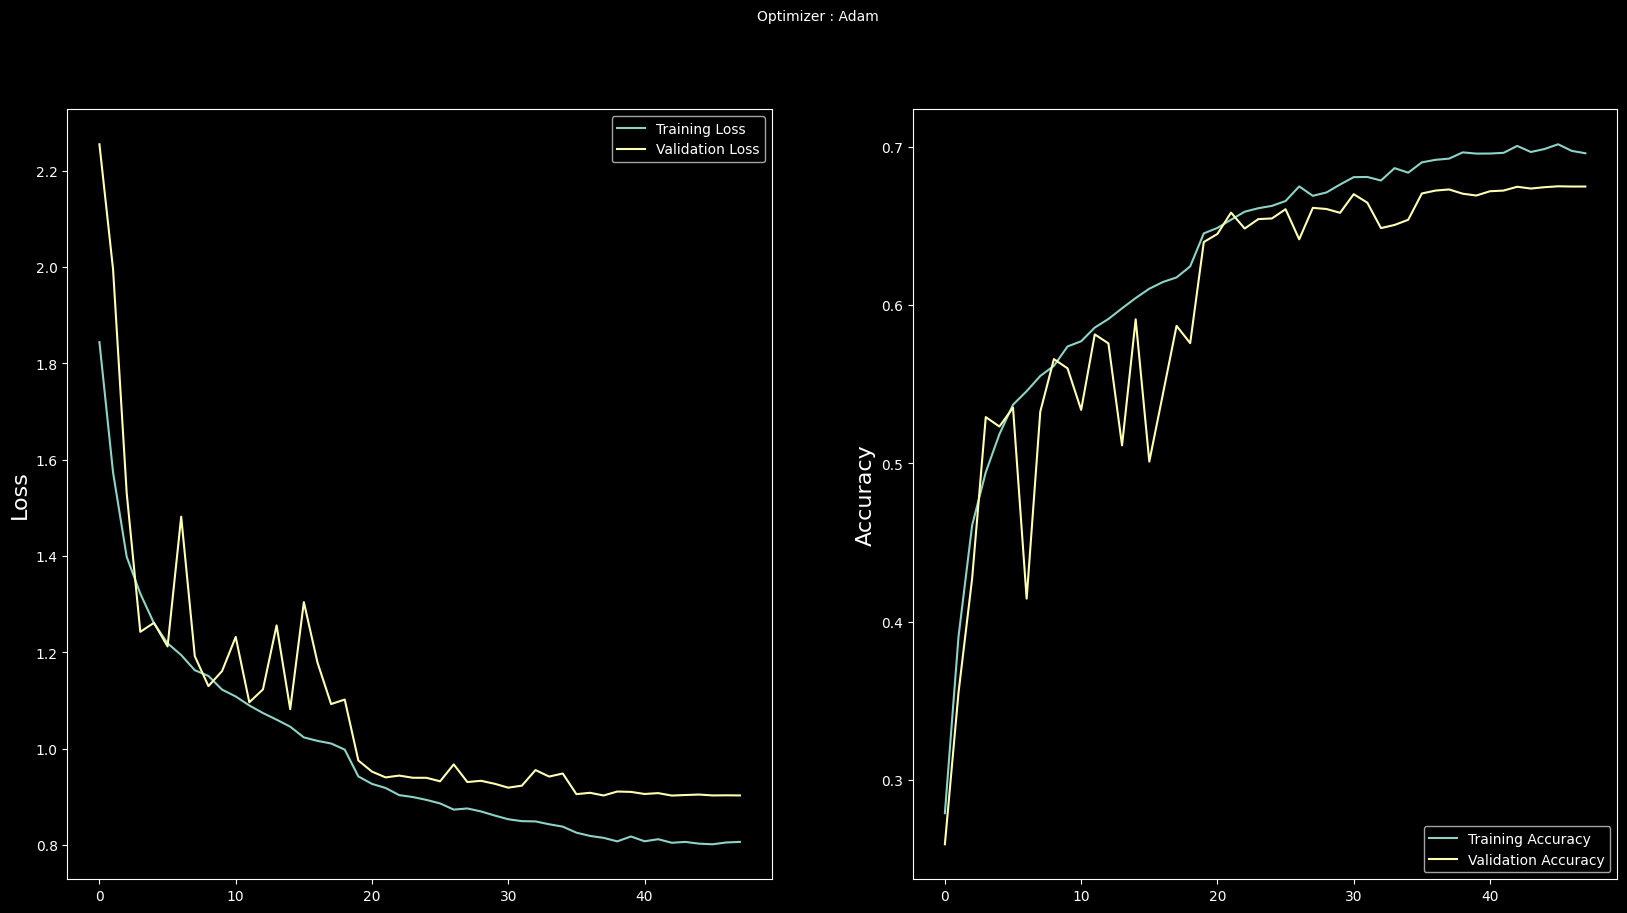

In [26]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [27]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/my_models/fer_model8.h5')